# Website A/B Testing - Lab

## Introduction

In this lab, you'll get another chance to practice your skills at conducting a full A/B test analysis. It will also be a chance to practice your data exploration and processing skills! The scenario you'll be investigating is data collected from the homepage of a music app page for audacity.

## Objectives

You will be able to:
* Analyze the data from a website A/B test to draw relevant conclusions
* Explore and analyze web action data

## Exploratory Analysis

Start by loading in the dataset stored in the file 'homepage_actions.csv'. Then conduct an exploratory analysis to get familiar with the data.

> Hints:
    * Start investigating the id column:
        * How many viewers also clicked?
        * Are there any anomalies with the data; did anyone click who didn't view?
        * Is there any overlap between the control and experiment groups? 
            * If so, how do you plan to account for this in your experimental design?

In [1]:
#Your code here
import pandas as pd
df = pd.read_csv('homepage_actions.csv')

In [2]:
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


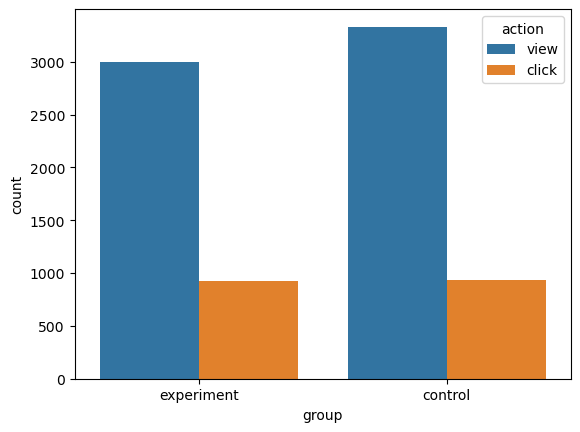

In [5]:
import seaborn as sns
sns.countplot(data=df, x='group', hue='action');

## Conduct a Statistical Test

Conduct a statistical test to determine whether the experimental homepage was more effective than that of the control group.

In [16]:
#Your code here
import numpy as np
from scipy.stats import chi2_contingency

# Calculate the counts for each group-action combination
counts = df.groupby(['group', 'action']).size().unstack()

# Extract the counts for each group-action combination
control_view = counts.loc['control', 'view']
control_click = counts.loc['control', 'click']
experiment_view = counts.loc['experiment', 'view']
experiment_click = counts.loc['experiment', 'click']

contingency_table = np.array([[experiment_view, experiment_click],
                              [control_view, control_click]])

# Perfrom the chi-square test
stat, p, dof, expected = chi2_contingency(contingency_table)

# Print the test statistics and p-value
print("Chi-square statistic:", stat)
print("p-value:", p)
print("Degrees of freedom:", dof)

Chi-square statistic: 3.636160051233291
p-value: 0.056537191086915774
Degrees of freedom: 1


## Verifying Results

One sensible formulation of the data to answer the hypothesis test above would be to create a binary variable representing each individual in the experiment and control group. This binary variable would represent whether or not that individual clicked on the homepage; 1 for they did and 0 if they did not. 

The variance for the number of successes in a sample of a binomial variable with n observations is given by:

## $n\bullet p (1-p)$

Given this, perform 3 steps to verify the results of your statistical test:
1. Calculate the expected number of clicks for the experiment group, if it had the same click-through rate as that of the control group. 
2. Calculate the number of standard deviations that the actual number of clicks was from this estimate. 
3. Finally, calculate a p-value using the normal distribution based on this z-score.

### Step 1:
Calculate the expected number of clicks for the experiment group, if it had the same click-through rate as that of the control group. 

In [17]:
#Your code here
df['action_binary'] = df['action'].apply(lambda x: 1 if x == 'click' else 0)

In [20]:
total_experiment = experiment_click + experiment_view
total_control = control_click + control_view

In [25]:
# Calculate click-through rate (CTR) of the control group
control_ctr = control_click / total_control

# Calculate the expected number of clicks in the experiment group
experiment_expected_click = control_ctr * total_experiment

# Print the expected number of clicks in the experiment group
print("Expected clicks in the experiment group:", experiment_expected_click)

Expected clicks in the experiment group: 857.6848030018762


### Step 2:
Calculate the number of standard deviations that the actual number of clicks was from this estimate.

In [31]:
#Your code here
import math

# # Calculate the standard deviation of the number of clicks in the experiment group
experiment = df[df['group'] == 'experiment']['action_binary']
experiment_std = np.std(experiment)

# Calculate the z-score
z_score = (experiment_click/total_experiment - experiment_expected_click/total_experiment) / experiment_std

# Print the number of standard deviations
print("Number of standard deviations:", z_score)

Number of standard deviations: 0.04217006837794211


### Step 3: 
Finally, calculate a p-value using the normal distribution based on this z-score.

In [32]:
#Your code here
from scipy.stats import norm
# Calculate the p-value
p_value = 1 - norm.cdf(z_score)

# Print the p-value
print("p-value:", p_value)

p-value: 0.48318156165022363


### Analysis:

Does this result roughly match that of the previous statistical test?

> Comment: **Your analysis here**

## Summary

In this lab, you continued to get more practice designing and conducting AB tests. This required additional work preprocessing and formulating the initial problem in a suitable manner. Additionally, you also saw how to verify results, strengthening your knowledge of binomial variables, and reviewing initial statistical concepts of the central limit theorem, standard deviation, z-scores, and their accompanying p-values.